Cricket Player Performance Prediction PPT

https://drive.google.com/file/d/1-1raFI2s9quTD99ONbJM__AMplOO4Hgn/view?usp=sharing

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
import pandas as pd

import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")
import plotly.express as px


Importing datasets


In [6]:
df=pd.read_excel("2023 WORLD CUP DATASET.xlsx")
df2=pd.read_excel("2023 WORLD CUP DATASET.xlsx",sheet_name=1)


In [7]:
df2021bat=pd.read_excel("2021-2023 CRICKET PLAYER STATS DATA.xlsx")
df2021bowl=pd.read_excel('2021-2023 CRICKET PLAYER STATS DATA.xlsx',sheet_name=1)
df2021bat.dtypes

Player           object
Plays IPL         int64
Asian Country     int64
Age               int64
Batting Hand     object
Type             object
Wicket Keeper     int64
Country          object
Span             object
Mat              object
Inns             object
NO               object
Runs             object
HS               object
Ave              object
BF               object
SR               object
100              object
50               object
0                object
4s               object
6s               object
WC Runs          object
dtype: object

In [8]:
pd.set_option('display.max_columns', None)

df2

,Player,Age,Country,Span,Mat,Inns,Balls,Mdns,Runs,Wkts,BBI,BBI.1,Ave,Econ,SR,5,10,Ct,St
0,A Dutt,20,Netherlands,2023-2023,9,9,465,6,426,10,NaN,1944-03-01 00:00:00,42.6,5.49,46.5,-,-,5,-
1,A Zampa,31,Australia,2023-2023,11,11,576,1,515,23,NaN,2023-08-04 00:00:00,22.39,5.36,25,-,-,2,-
2,AAP Atkinson,25,England,2023-2023,3,3,144,-,146,4,NaN,1945-02-01 00:00:00,36.5,6.08,36,-,-,-,-
3,Abdullah Shafique,23,Pakistan,2023-2023,8,-,0,-,-,-,-,-,-,-,-,-,-,2,-
4,AD Mathews,36,Sri Lanka,2023-2023,5,5,133,2,107,6,NaN,2014-02-01 00:00:00,17.83,4.82,22.1,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Usama Mir,27,Pakistan,2023-2023,4,4,210,-,248,4,NaN,1945-02-01 00:00:00,62,7.08,52.5,-,-,5,-
147,V Kohli,34,India,2023-2023,11,2,21,-,15,1,NaN,2013-01-01 00:00:00,15,4.28,21,-,-,6,-
148,Vikramjit Singh,20,Netherlands,2023-2023,6,3,42,-,52,-,NaN,-,-,7.42,-,-,-,1,-
149,W Barresi,39,Netherlands,2023-2023,4,-,0,-,-,-,NaN,-,-,-,-,-,-,1,-


Renaming numeric columns

In [9]:
def rename(x):
    return x.rename(columns={100: 'Hundreds', 50: 'Fifties', 0: 'Ducks'})

df = rename(df)


In [10]:
df.dtypes

Player       object
Age           int64
Country      object
Span         object
Mat           int64
Inns         object
Outs        float64
NO            int64
Runs         object
HS           object
Ave          object
SR          float64
Hundreds     object
Fifties      object
Ducks        object
dtype: object

Converting datatypes to int or float

In [11]:
vals=[     'Age',        'Mat',    'Inns',
          'Outs',      'NO',    'Runs',      'HS',     'Ave',      'SR',
            'Hundreds',        'Fifties',         'Ducks']
def convert(x):
  for val in vals:
    x.convert_dtypes(val,int)
    x[val]=pd.to_numeric(x[val],errors='coerce')
  return x
convert(df)

,Player,Age,Country,Span,Mat,Inns,Outs,NO,Runs,HS,Ave,SR,Hundreds,Fifties,Ducks
0,A Dutt,20,Netherlands,2023-2023,9,9.0,6.0,3,70.0,23.0,11.66,80.45,NaN,NaN,NaN
1,A Zampa,31,Australia,2023-2023,11,6.0,3.0,3,48.0,29.0,16.00,80.00,NaN,NaN,1.0
2,AAP Atkinson,25,England,2023-2023,3,3.0,2.0,1,37.0,35.0,18.50,160.86,NaN,NaN,1.0
3,Abdullah Shafique,23,Pakistan,2023-2023,8,8.0,8.0,0,336.0,113.0,42.00,93.33,1.0,3.0,1.0
4,AD Mathews,36,Sri Lanka,2023-2023,5,4.0,4.0,0,51.0,23.0,12.75,65.38,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Usama Mir,27,Pakistan,2023-2023,4,1.0,1.0,0,NaN,0.0,0.00,0.00,NaN,NaN,1.0
147,V Kohli,34,India,2023-2023,11,11.0,8.0,3,765.0,117.0,95.62,90.31,3.0,6.0,1.0
148,Vikramjit Singh,20,Netherlands,2023-2023,6,6.0,6.0,0,98.0,52.0,16.33,65.33,NaN,1.0,NaN
149,W Barresi,39,Netherlands,2023-2023,4,4.0,4.0,0,83.0,41.0,20.75,74.10,NaN,NaN,NaN


In [12]:
vals=[      'Age',      'Mat',    'Inns',
             'Mdns',    'Runs',    'Wkts',
           'Ave',    'Econ',      'SR',         5,        10,      'Ct',
            'St']
convert(df2)


,Player,Age,Country,Span,Mat,Inns,Balls,Mdns,Runs,Wkts,BBI,BBI.1,Ave,Econ,SR,5,10,Ct,St
0,A Dutt,20,Netherlands,2023-2023,9,9.0,465,6.0,426.0,10.0,NaN,1944-03-01 00:00:00,42.60,5.49,46.5,NaN,NaN,5.0,NaN
1,A Zampa,31,Australia,2023-2023,11,11.0,576,1.0,515.0,23.0,NaN,2023-08-04 00:00:00,22.39,5.36,25.0,NaN,NaN,2.0,NaN
2,AAP Atkinson,25,England,2023-2023,3,3.0,144,NaN,146.0,4.0,NaN,1945-02-01 00:00:00,36.50,6.08,36.0,NaN,NaN,NaN,NaN
3,Abdullah Shafique,23,Pakistan,2023-2023,8,NaN,0,NaN,NaN,NaN,-,-,NaN,NaN,NaN,NaN,NaN,2.0,NaN
4,AD Mathews,36,Sri Lanka,2023-2023,5,5.0,133,2.0,107.0,6.0,NaN,2014-02-01 00:00:00,17.83,4.82,22.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Usama Mir,27,Pakistan,2023-2023,4,4.0,210,NaN,248.0,4.0,NaN,1945-02-01 00:00:00,62.00,7.08,52.5,NaN,NaN,5.0,NaN
147,V Kohli,34,India,2023-2023,11,2.0,21,NaN,15.0,1.0,NaN,2013-01-01 00:00:00,15.00,4.28,21.0,NaN,NaN,6.0,NaN
148,Vikramjit Singh,20,Netherlands,2023-2023,6,3.0,42,NaN,52.0,NaN,NaN,-,NaN,7.42,NaN,NaN,NaN,1.0,NaN
149,W Barresi,39,Netherlands,2023-2023,4,NaN,0,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,1.0,NaN


Dropping a few non necessary columns

In [13]:
def drop_columns(x,y):
    x=x.fillna(0)
    for i in y:
        x=x.drop(i,axis=1)
    return x



In [14]:
cols_to_drop=['BBI','BBI.1']

df2=drop_columns(df2,cols_to_drop)

EDA

In [15]:
grouped_df = df.groupby('Country')['Runs'].sum().reset_index()


grouped_df
gig=px.bar(grouped_df,x=grouped_df['Country'],y=grouped_df['Runs'],color='Runs')
gig.show()

In [16]:
grouped_df = df2.groupby('Country')['Wkts'].sum().reset_index()


grouped_df
gig=px.bar(grouped_df,x=grouped_df['Country'],y=grouped_df['Wkts'],color='Wkts')
gig.show()

In [17]:
#Dropping Columns in df2 (Bowling)
cols=['Span']
df=drop_columns(df,cols)
df2=drop_columns(df2,cols)

In [18]:
import pandas as pd
icc_rankings = {'England': 1,'India': 2, 'New Zealand':3,'Australia': 4,'South Africa': 5, 'Pakistan': 6,'Bangladesh':7,'Sri Lanka':8,'Afghanistan':9,'Netherlands':10}

df['Country Code'] = df['Country'].map(icc_rankings)
df2['Country Code']=df2['Country'].map(icc_rankings)

df

,Player,Age,Country,Mat,Inns,Outs,NO,Runs,HS,Ave,SR,Hundreds,Fifties,Ducks,Country Code
0,A Dutt,20,Netherlands,9,9.0,6.0,3,70.0,23.0,11.66,80.45,0.0,0.0,0.0,10
1,A Zampa,31,Australia,11,6.0,3.0,3,48.0,29.0,16.00,80.00,0.0,0.0,1.0,4
2,AAP Atkinson,25,England,3,3.0,2.0,1,37.0,35.0,18.50,160.86,0.0,0.0,1.0,1
3,Abdullah Shafique,23,Pakistan,8,8.0,8.0,0,336.0,113.0,42.00,93.33,1.0,3.0,1.0,6
4,AD Mathews,36,Sri Lanka,5,4.0,4.0,0,51.0,23.0,12.75,65.38,0.0,0.0,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Usama Mir,27,Pakistan,4,1.0,1.0,0,0.0,0.0,0.00,0.00,0.0,0.0,1.0,6
147,V Kohli,34,India,11,11.0,8.0,3,765.0,117.0,95.62,90.31,3.0,6.0,1.0,2
148,Vikramjit Singh,20,Netherlands,6,6.0,6.0,0,98.0,52.0,16.33,65.33,0.0,1.0,0.0,10
149,W Barresi,39,Netherlands,4,4.0,4.0,0,83.0,41.0,20.75,74.10,0.0,0.0,0.0,10


Immporting past 3 years dataset


In [19]:
df2021bowl

,Player,Age,Country,Bowling Type,Type,Wicket Keeper,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,World Cup Wkts
0,WA Young,30,New Zealand,-,Batter,1,2021-2023,22,-,-,-,-,-,-,-,-,-,-,-,-
1,TWM Latham,31,New Zealand,-,Batter,1,2021-2023,35,-,-,-,-,-,-,-,-,-,-,-,-
2,MS Chapman,29,New Zealand,Spin,Batter,0,2022-2023,6,-,-,-,-,-,-,-,-,-,-,-,-
3,KS Williamson,33,New Zealand,-,Batter,0,2022-2023,10,-,-,-,-,-,-,-,-,-,-,-,-
4,DP Conway,32,New Zealand,-,Batter,1,2021-2023,22,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,DJ Malan,36,England,-,Batter,0,2021-2023,20,2,2.3,0,17,1,1/5,17,6.8,15,0,0,-
147,Rahmat Shah,30,Afghanistan,-,Batter,0,2021-2023,24,2,2.1,0,16,1,1/6,16,7.38,13,0,0,-
148,H Klaasen,32,South Africa,-,Batter,1,2021-2023,24,1,2,0,14,0,-,-,7,-,0,0,-
149,AT Nidamanuru,29,Netherlands,Spin,Batter,0,2022-2023,20,1,1,0,8,0,-,-,8,-,0,0,-


In [20]:
import plotly.express as px

fig = px.box(df2021bat, y="SR",points='all')
fig.show()

PREPROCESSING using created functions

In [21]:
vals=[        'Mat',    'Inns',      'NO',
          'Runs',      'HS',     'Ave',      'BF',      'SR',       100,
              50,         0,      '4s',      '6s']
df2021bat=convert(df2021bat)

In [22]:
vals=[
                'Mat',         'Inns',        'Overs',         'Mdns',
               'Runs',         'Wkts',                  'Ave',
               'Econ',           'SR',              4,              5]
df2021bowl=convert(df2021bowl)

In [23]:
cols=['Span']
df2021bat=drop_columns(df2021bat,cols)

In [24]:
cols=['Span','BBI']
df2021bowl=drop_columns(df2021bowl,cols)

In [25]:
rename(df2021bat)
df2021bowl=df2021bowl.rename(columns={4:'4W',5:'5W'})

In [26]:
import seaborn as sns

fig=px.scatter_3d(df2021bat,x=df2021bat['BF'],y=df2021bat['Runs'],z=df2021bat['6s'],color=df2021bat['Player'])
fig.show()

In [27]:
import seaborn as sns

fig=px.scatter_3d(df2021bowl,x=df2021bowl['SR'],y=df2021bowl['Runs'],z=df2021bowl['Wkts'],color=df2021bowl['Player'])
fig.show()

In [28]:

df2021bowl.replace('-',0,inplace=True)
df2021bowl

,Player,Age,Country,Bowling Type,Type,Wicket Keeper,Mat,Inns,Overs,Mdns,Runs,Wkts,Ave,Econ,SR,4W,5W,World Cup Wkts
0,WA Young,30,New Zealand,0,Batter,1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
1,TWM Latham,31,New Zealand,0,Batter,1,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
2,MS Chapman,29,New Zealand,Spin,Batter,0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
3,KS Williamson,33,New Zealand,0,Batter,0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
4,DP Conway,32,New Zealand,0,Batter,1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,DJ Malan,36,England,0,Batter,0,20.0,2.0,2.3,0.0,17.0,1.0,17.0,6.80,15.0,0.0,0.0,0
147,Rahmat Shah,30,Afghanistan,0,Batter,0,24.0,2.0,2.1,0.0,16.0,1.0,16.0,7.38,13.0,0.0,0.0,0
148,H Klaasen,32,South Africa,0,Batter,1,24.0,1.0,2.0,0.0,14.0,0.0,0.0,7.00,0.0,0.0,0.0,0
149,AT Nidamanuru,29,Netherlands,Spin,Batter,0,20.0,1.0,1.0,0.0,8.0,0.0,0.0,8.00,0.0,0.0,0.0,0


In [29]:
px.histogram(df2021bat['Runs'],color=df2021bat['Country'])

In [30]:
grouped=df2021bat.groupby('Country')['Runs'].sum().reset_index()
grouped=grouped.sort_values(by='Runs',ascending=False)


In [31]:

from plotly import graph_objects as go
fig = go.Figure(go.Funnel(
    y = grouped['Country'],
    x = grouped['Runs']))

fig.show()

In [32]:
import plotly.express as px


fig = px.box(df2021bat, y=['Ave', 'SR', 'Boundary %'], points='all')
fig.show()


In [33]:
fig=px.scatter(df2021bat,x='Runs',y='BF',trendline="ols")

fig.show()

In [34]:
df2021bat.columns

Index([       'Player',     'Plays IPL', 'Asian Country',           'Age',
        'Batting Hand',          'Type', 'Wicket Keeper',       'Country',
                 'Mat',          'Inns',            'NO',          'Runs',
                  'HS',           'Ave',            'BF',            'SR',
                   100,              50,               0,            '4s',
                  '6s',       'WC Runs'],
      dtype='object')

In [35]:
desired_columns = ['Player', 'Bowling Type', 'Mat', 'Wkts']
desired_df = df2021bowl[desired_columns]
desired_df=desired_df.sort_values(by=['Mat'],ascending=False)
desired_df=desired_df[desired_df['Bowling Type']!=0]


In [36]:
desired_df=desired_df.groupby('Bowling Type')['Wkts'].sum().reset_index()


sig=px.bar(desired_df,x=desired_df['Bowling Type'],y=desired_df['Wkts'],color='Wkts')
sig.show()

In [37]:
desired_df=desired_df.groupby('Bowling Type')['Wkts'].sum().reset_index()


pie=px.pie(desired_df,values='Wkts',names='Bowling Type',color='Wkts')
pie.show()
print('Pacers = 1186 Wicket\nSpinners = 752 Wickets ')


Pacers = 1186 Wicket
Spinners = 752 Wickets 


Encoding countries using their rankings

In [38]:

import pandas as pd
icc_rankings = {'England': 1,'India': 2, 'New Zealand':3,'Australia': 4,'South Africa': 5, 'Pakistan': 6,'Bangladesh':7,'Srilanka':8,'Afghanistan':9,'Netherlands':10}

df2021bat['Country Code'] = df2021bat['Country'].map(icc_rankings)
df2021bowl['Country Code'] =df2021bowl['Country'].map(icc_rankings)

df2021bat

,Player,Plays IPL,Asian Country,Age,Batting Hand,Type,Wicket Keeper,Country,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,WC Runs,Country Code
0,A Dutt,0,0,20,Right,0,0,Netherlands,25.0,18.0,4.0,100.0,16.0,7.14,171.0,58.47,0.0,0.0,3.0,7.0,2.0,70,10
1,A Zampa,1,0,31,Right,Bowler,0,Australia,24.0,14.0,7.0,109.0,36.0,15.57,160.0,68.12,0.0,0.0,1.0,13.0,0.0,48,4
2,AAP Atkinson,0,0,25,Right,Bowler,0,England,3.0,1.0,0.0,2.0,2.0,2.00,3.0,66.66,0.0,0.0,0.0,0.0,0.0,37,1
3,Abdullah Shafique,0,1,23,Right,Batter,0,Pakistan,4.0,4.0,0.0,80.0,52.0,20.00,111.0,72.07,0.0,1.0,0.0,3.0,3.0,336,6
4,AD Mathews,0,1,36,Right,Batter,0,Srilanka,4.0,4.0,0.0,35.0,18.0,8.75,61.0,57.37,0.0,0.0,1.0,3.0,0.0,51,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Usama Mir,0,1,27,Right,Bowler,0,Pakistan,8.0,5.0,0.0,40.0,20.0,8.00,31.0,129.03,0.0,0.0,1.0,2.0,3.0,-,6
147,V Kohli,1,1,34,Right,Batter,0,India,30.0,27.0,2.0,1043.0,166.0,41.72,1038.0,100.48,4.0,6.0,2.0,96.0,18.0,765,2
148,Vikramjit Singh,0,0,20,Left,Batter,0,Netherlands,25.0,25.0,0.0,808.0,110.0,32.32,1047.0,77.17,1.0,4.0,1.0,97.0,12.0,98,10
149,W Barresi,0,0,39,Right,Batter,0,Netherlands,13.0,13.0,0.0,266.0,97.0,20.46,295.0,90.16,0.0,2.0,1.0,29.0,4.0,83,10


In [39]:
#renaming numeric columns
df2021bat=df2021bat.rename(columns={100:'Hundreds',50:'Fifties',0:'Ducks'})


In [40]:
#Replacing '0' with All Rounder
df2021bat['Type'].replace(0,'All Rounder',inplace=True)
df2021bowl['Type'].replace(0,'All Rounder',inplace=True)

Encoding Categorical Variables in our dataset

In [41]:
df2021bowl['Bowling Type'] = df2021bowl['Bowling Type'].astype(str)


In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df2021bat['Batting Hand'] = label_encoder.fit_transform(df2021bat['Batting Hand'])
df2021bat['Type'] = label_encoder.fit_transform(df2021bat['Type'])
df2021bowl['Type'] = label_encoder.fit_transform(df2021bowl['Type'] )
df2021bowl['Bowling Type'] = label_encoder.fit_transform(df2021bowl['Bowling Type'])



In [43]:
colss=['Mat']
df2021bat=drop_columns(df2021bat,colss)


In [44]:
#our dataset considered 0 to be a string instead of int, so we conver it back to string
df2021bowl['Bowling Type'].replace(0,'0',inplace=True)

In [45]:
df=df.drop(['Country'],axis=1)
df2=df2.drop(['Country'],axis=1)
df2021bat=df2021bat.drop(['Country'],axis=1)


In [46]:
df2021bat

,Player,Plays IPL,Asian Country,Age,Batting Hand,Type,Wicket Keeper,Inns,NO,Runs,HS,Ave,BF,SR,Hundreds,Fifties,Ducks,4s,6s,WC Runs,Country Code
0,A Dutt,0,0,20,1,0,0,18.0,4.0,100.0,16.0,7.14,171.0,58.47,0.0,0.0,3.0,7.0,2.0,70,10
1,A Zampa,1,0,31,1,2,0,14.0,7.0,109.0,36.0,15.57,160.0,68.12,0.0,0.0,1.0,13.0,0.0,48,4
2,AAP Atkinson,0,0,25,1,2,0,1.0,0.0,2.0,2.0,2.00,3.0,66.66,0.0,0.0,0.0,0.0,0.0,37,1
3,Abdullah Shafique,0,1,23,1,1,0,4.0,0.0,80.0,52.0,20.00,111.0,72.07,0.0,1.0,0.0,3.0,3.0,336,6
4,AD Mathews,0,1,36,1,1,0,4.0,0.0,35.0,18.0,8.75,61.0,57.37,0.0,0.0,1.0,3.0,0.0,51,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Usama Mir,0,1,27,1,2,0,5.0,0.0,40.0,20.0,8.00,31.0,129.03,0.0,0.0,1.0,2.0,3.0,-,6
147,V Kohli,1,1,34,1,1,0,27.0,2.0,1043.0,166.0,41.72,1038.0,100.48,4.0,6.0,2.0,96.0,18.0,765,2
148,Vikramjit Singh,0,0,20,0,1,0,25.0,0.0,808.0,110.0,32.32,1047.0,77.17,1.0,4.0,1.0,97.0,12.0,98,10
149,W Barresi,0,0,39,1,1,0,13.0,0.0,266.0,97.0,20.46,295.0,90.16,0.0,2.0,1.0,29.0,4.0,83,10


In [47]:
df2021bat['Boundary % (Balls)']=((df2021bat['4s']+df2021bat['6s'])/df2021bat['BF'])*100
df2021bat['Boundary % (Runs)']=(((df2021bat['4s']*4)+df2021bat['6s']*6)/df2021bat['Runs'])*100
df2021bat['NBSR']=100*(df2021bat['Runs']-(df2021bat['4s']*4)-(df2021bat['6s']*6))/(df2021bat['BF']-(df2021bat['4s']+df2021bat['6s']))
lists=['Ave','SR','Boundary % (Balls)','Boundary % (Runs)']
for i in lists:
    print(df2021bat[i].describe())


count    151.000000
mean      26.174967
std       16.655416
min        0.000000
25%       12.075000
50%       27.660000
75%       39.630000
max       71.840000
Name: Ave, dtype: float64
count    151.000000
mean      83.790530
std       26.594246
min        0.000000
25%       71.015000
50%       85.230000
75%       96.765000
max      175.000000
Name: SR, dtype: float64
count    148.000000
mean       9.585318
std        4.545956
min        0.000000
25%        6.935016
50%        9.155066
75%       11.560959
max       25.000000
Name: Boundary % (Balls), dtype: float64
count    148.000000
mean      47.804368
std       15.150104
min        0.000000
25%       40.290456
50%       47.651570
75%       56.764944
max      100.000000
Name: Boundary % (Runs), dtype: float64


In [48]:
df2021bat['NBSR']=df2021bat['NBSR'].fillna(0)

In [49]:
def classify_batter_mentality(row, ave_q1, ave_q2, ave_q3, sr_q1, sr_q2, sr_q3, bp_q1, bp_q2, bp_q3):
    ave = row['Ave']
    sr = row['SR']
    boundary_percent = row['Boundary % (Balls)']

    if ave >= ave_q2 and sr >= sr_q2 and boundary_percent >= bp_q2:
        return 'Aggressive'
    elif ave >= ave_q2 and sr >= sr_q1 and boundary_percent >= bp_q2:
        return 'Neutral'
    elif ave >= ave_q1 and sr >= sr_q1 and boundary_percent >= bp_q1:
        return 'Mildly Defensive'
    else:
        return 'Defensive'

ave_q1, ave_q2, ave_q3 = df2021bat['Ave'].quantile([0.25, 0.4, 0.75])
sr_q1, sr_q2, sr_q3 = df2021bat['SR'].quantile([0.25, 0.5, 0.75])
bp_q1, bp_q2, bp_q3 = df2021bat['Boundary % (Balls)'].quantile([0.25, 0.5, 0.75])


df2021bat['Mentality'] = df2021bat.apply(classify_batter_mentality, args=(ave_q1, ave_q2, ave_q3, sr_q1, sr_q2, sr_q3, bp_q1, bp_q2, bp_q3), axis=1)
df2021bat['Mentality'].value_counts()

Mentality
Defensive           55
Aggressive          47
Mildly Defensive    40
Neutral              9
Name: count, dtype: int64

In [50]:
fastscorers=df2021bat.sort_values(by='Boundary % (Balls)',ascending=False)
fastscorers=fastscorers[fastscorers['Runs']>350]
fastscorers=fastscorers.head(10)

In [51]:
import plotly.graph_objects as go
import pandas as pd



bf = fastscorers['BF']
bound = fastscorers['Boundary % (Balls)']


fig = go.Figure()


fig.add_trace(go.Scatter(x=bf, y=bound, mode='markers'))

for player, x, y in zip(fastscorers['Player'], bf, bound):
    fig.add_annotation(x=x, y=y, text=player, showarrow=False)


fig.update_layout(title='Scatter Plot of Balls Faced vs. Boundary Percentage',
                  xaxis_title='Balls Faced',
                  yaxis_title='Boundary Percentage')

fig.show()


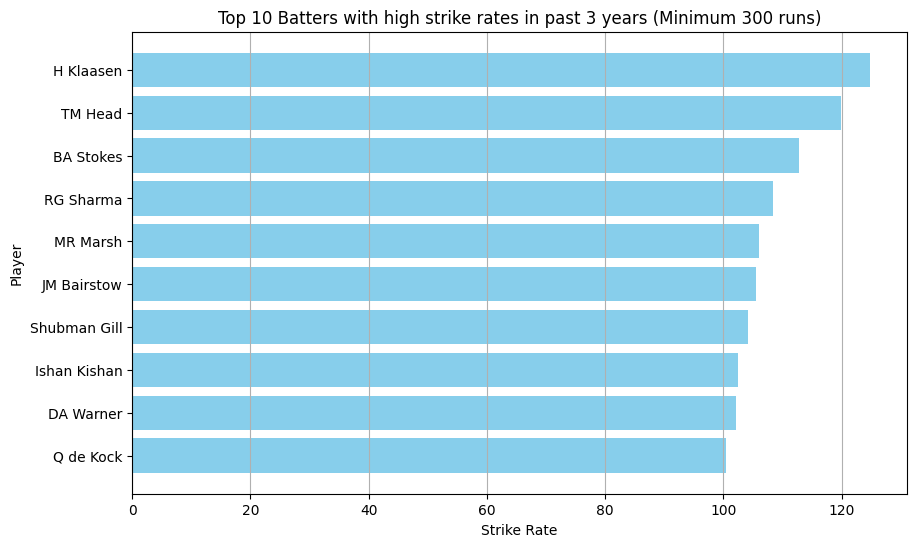

In [52]:
import matplotlib.pyplot as plt

fastscorers=fastscorers.sort_values(by='SR')
plt.figure(figsize=(10, 6))
plt.barh(fastscorers['Player'], fastscorers['SR'], color='skyblue')
plt.ylabel('Player')
plt.xlabel('Strike Rate')
plt.title('Top 10 Batters with high strike rates in past 3 years (Minimum 300 runs)')
plt.grid(axis='x')
plt.show()


In [53]:
slowscorers=df2021bat.sort_values(by='Boundary % (Balls)',ascending=True)
slowscorers=slowscorers[slowscorers['Runs']>350]
slowscorers=slowscorers.sort_values(by='SR',ascending=True).head(10)



In [54]:
import plotly.graph_objects as go
import pandas as pd




bf = slowscorers['BF']
bound = slowscorers['Boundary % (Balls)']

fig = go.Figure()
fig.add_trace(go.Scatter(x=bf, y=bound, mode='markers'))


for player, x, y in zip(slowscorers['Player'], bf, bound):
    fig.add_annotation(x=x, y=y, text=player, showarrow=False)


fig.update_layout(title='Scatter Plot of Balls Faced vs. Boundary Percentage',
                  xaxis_title='Balls Faced',
                  yaxis_title='Boundary Percentage')

fig.show()


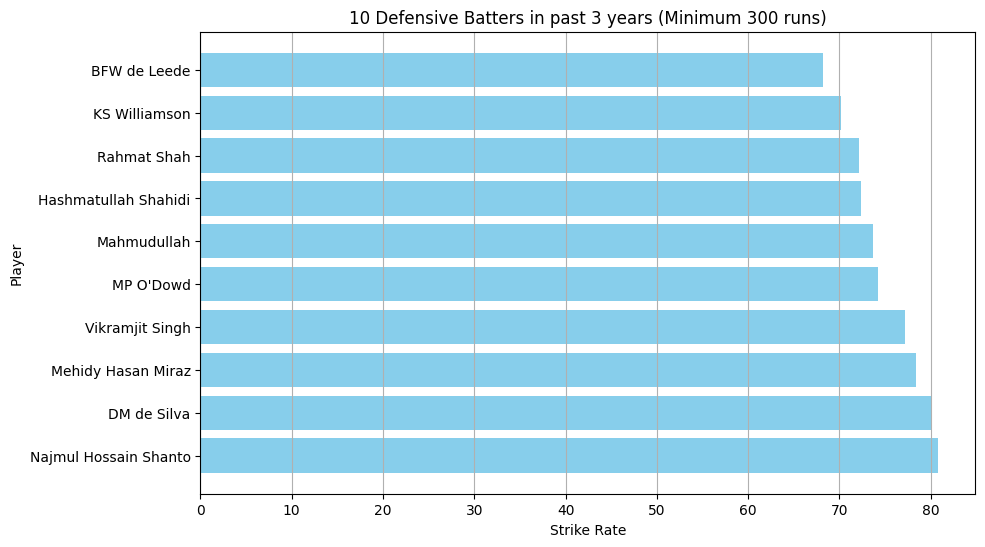

In [55]:
import matplotlib.pyplot as plt


slowscorers=slowscorers.sort_values(by='SR',ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(slowscorers['Player'], slowscorers['SR'], color='skyblue')
plt.ylabel('Player')
plt.xlabel('Strike Rate')
plt.title('10 Defensive Batters in past 3 years (Minimum 300 runs)')
plt.grid(axis='x')
plt.show()


In [56]:
filtered=df2021bat.set_index('Player',inplace=True)

In [57]:
filtered=df2021bat
filtered.sort_values(by='Runs',ascending=True)

,Plays IPL,Asian Country,Age,Batting Hand,Type,Wicket Keeper,Inns,NO,Runs,HS,Ave,BF,SR,Hundreds,Fifties,Ducks,4s,6s,WC Runs,Country Code,Boundary % (Balls),Boundary % (Runs),NBSR,Mentality
Player,,,,,,,,,,,,,,,,,,,,,,,,
SA Engelbrecht,0,0,35,1,1,0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,300,10,NaN,NaN,0.000000,Defensive
RE van der Merwe,0,0,38,1,0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,68,10,NaN,NaN,0.000000,Defensive
LB Williams,0,0,30,0,2,0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,-,5,NaN,NaN,0.000000,Defensive
AAP Atkinson,0,0,25,1,2,0,1.0,0.0,2.0,2.0,2.00,3.0,66.66,0.0,0.0,0.0,0.0,0.0,37,1,0.000000,0.000000,66.666667,Defensive
G Coetzee,0,0,23,1,2,0,3.0,0.0,3.0,2.0,1.00,12.0,25.00,0.0,0.0,1.0,0.0,0.0,54,5,0.000000,0.000000,25.000000,Defensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KIC Asalanka,0,1,26,0,1,0,36.0,5.0,1272.0,110.0,41.03,1425.0,89.26,1.0,9.0,2.0,104.0,22.0,288,8,8.842105,43.081761,55.735181,Mildly Defensive
Fakhar Zaman,0,1,33,0,1,0,30.0,1.0,1312.0,193.0,45.24,1500.0,87.46,6.0,2.0,1.0,149.0,24.0,220,6,11.533333,56.402439,43.104748,Aggressive
P Nissanka,0,1,25,1,1,0,40.0,3.0,1396.0,137.0,37.72,1669.0,83.64,3.0,9.0,2.0,176.0,6.0,332,8,10.904733,53.008596,44.115669,Neutral


In [58]:
#Encoding Player mentalities
from sklearn.preprocessing import LabelEncoder


category_order = ['Aggressive', 'Neutral', 'Mildly Defensive', 'Defensive']


label_encoder = LabelEncoder()


label_encoder.fit(category_order)

filtered['batting_mentality_encoded'] = label_encoder.transform(filtered['Mentality'])





In [59]:
filtered=filtered.drop(['Mentality'],axis=1)

In [60]:
filtered=filtered.replace('-',0)

In [61]:
import plotly.express as px

fig = px.box(filtered, y='WC Runs',points='all')
fig.show()

In [62]:
filtered=filtered.drop('V Kohli')


In [63]:
filtered=filtered.fillna(0)
filtered

,Plays IPL,Asian Country,Age,Batting Hand,Type,Wicket Keeper,Inns,NO,Runs,HS,Ave,BF,SR,Hundreds,Fifties,Ducks,4s,6s,WC Runs,Country Code,Boundary % (Balls),Boundary % (Runs),NBSR,batting_mentality_encoded
Player,,,,,,,,,,,,,,,,,,,,,,,,
A Dutt,0,0,20,1,0,0,18.0,4.0,100.0,16.0,7.14,171.0,58.47,0.0,0.0,3.0,7.0,2.0,70,10,5.263158,40.000000,37.037037,1
A Zampa,1,0,31,1,2,0,14.0,7.0,109.0,36.0,15.57,160.0,68.12,0.0,0.0,1.0,13.0,0.0,48,4,8.125000,47.706422,38.775510,1
AAP Atkinson,0,0,25,1,2,0,1.0,0.0,2.0,2.0,2.00,3.0,66.66,0.0,0.0,0.0,0.0,0.0,37,1,0.000000,0.000000,66.666667,1
Abdullah Shafique,0,1,23,1,1,0,4.0,0.0,80.0,52.0,20.00,111.0,72.07,0.0,1.0,0.0,3.0,3.0,336,6,5.405405,37.500000,47.619048,1
AD Mathews,0,1,36,1,1,0,4.0,0.0,35.0,18.0,8.75,61.0,57.37,0.0,0.0,1.0,3.0,0.0,51,8,4.918033,34.285714,39.655172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TWM Latham,0,0,31,0,1,1,31.0,4.0,1101.0,145.0,40.77,1237.0,89.00,3.0,5.0,3.0,93.0,14.0,155,3,8.649960,41.416894,57.079646,2
Usama Mir,0,1,27,1,2,0,5.0,0.0,40.0,20.0,8.00,31.0,129.03,0.0,0.0,1.0,2.0,3.0,0,6,16.129032,65.000000,53.846154,1
Vikramjit Singh,0,0,20,0,1,0,25.0,0.0,808.0,110.0,32.32,1047.0,77.17,1.0,4.0,1.0,97.0,12.0,98,10,10.410697,56.930693,37.100213,3


1) Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')
best_mae = float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs'], axis=1), filtered['WC Runs'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_mae = mae

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")
print(f"Corresponding MAE: {best_mae}")


Best test size: 0.15
Best random state: 0
Best R2 score: 0.4852737009954251
Corresponding MAE: 98.18193037173549


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0,420]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')
best_mae = float('inf')

for test_size in test_sizes:
    print(f"Test size: {test_size}")
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs'], axis=1), filtered['WC Runs'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Random state: {random_state} - R2 score: {r2} - MAE: {mae}")
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_mae = mae

print(f"\nBest test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")
print(f"Corresponding MAE: {best_mae}")


Test size: 0.15
Random state: 0 - R2 score: 0.4852737009954251 - MAE: 98.18193037173549
Random state: 420 - R2 score: 0.44542691637039444 - MAE: 71.3004875821262
Test size: 0.2
Random state: 0 - R2 score: 0.4255376434847724 - MAE: 110.80599884884658
Random state: 420 - R2 score: 0.39953830464882856 - MAE: 70.20137704592457
Test size: 0.25
Random state: 0 - R2 score: 0.41592886976340937 - MAE: 104.2350800869463
Random state: 420 - R2 score: 0.2871662881039688 - MAE: 84.60728572897017
Test size: 0.3
Random state: 0 - R2 score: 0.4042753588062945 - MAE: 103.46664943668713
Random state: 420 - R2 score: 0.31024796425979384 - MAE: 88.0900764957826

Best test size: 0.15
Best random state: 0
Best R2 score: 0.4852737009954251
Corresponding MAE: 98.18193037173549


In [66]:
X_train, X_test , y_train, y_test = train_test_split(filtered.drop(['WC Runs'],axis=1),filtered['WC Runs'], test_size=.15, random_state=0)

LRmodel = LinearRegression(fit_intercept=True)
LRmodel.fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)

2) Random Forest

With Average as Target

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['Ave'],axis=1),filtered['Ave'], test_size=test_size, random_state=random_state)
        rmodel = RandomForestRegressor(n_estimators=100, max_depth=5)
        rmodel.fit(X_train, y_train)
        y_pred = rmodel.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_mae=mae

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

print("Mean Absolute Error (MAE):", best_mae)

Best test size: 0.1
Best random state: 100
Best R2 score: 0.8934993478635154
Mean Absolute Error (MAE): 3.994095351312564


With WC Runs as Target

Printing Only best combinations


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

test_sizes = [0.1, 0.15, 0.2,0.25, 0.3,.35,.4]
random_states = [0, 1, 42, 43,69, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs'],axis=1),filtered['WC Runs'], test_size=test_size, random_state=random_state)
        rmodel = RandomForestRegressor(n_estimators=100, max_depth=5)
        rmodel.fit(X_train, y_train)
        y_pred = rmodel.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_mae=mae

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

print("Mean Absolute Error (MAE):", best_mae)

Best test size: 0.15
Best random state: 0
Best R2 score: 0.6001152244849257
Mean Absolute Error (MAE): 87.05866562331241


Printing scores for each combinations

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

test_sizes = [ 0.15, 0.2, 0.25]
random_states = [0,420]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')
best_mae = float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs'], axis=1), filtered['WC Runs'], test_size=test_size, random_state=random_state)
        rmodel = RandomForestRegressor(n_estimators=100, max_depth=5)
        rmodel.fit(X_train, y_train)
        y_pred = rmodel.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Test size: {test_size} - Random state: {random_state} - R2 score: {r2} - MAE: {mae}")
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_mae = mae

print(f"\nBest test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")
print(f"Corresponding MAE: {best_mae}")


Test size: 0.15 - Random state: 0 - R2 score: 0.6128341004956559 - MAE: 85.41543093861519
Test size: 0.15 - Random state: 420 - R2 score: 0.6601848860936569 - MAE: 50.153029930696896
Test size: 0.2 - Random state: 0 - R2 score: 0.5151056034705069 - MAE: 106.00277325755575
Test size: 0.2 - Random state: 420 - R2 score: 0.4624599893302337 - MAE: 56.65463703757403
Test size: 0.25 - Random state: 0 - R2 score: 0.5296205779967106 - MAE: 90.32780525023942
Test size: 0.25 - Random state: 420 - R2 score: 0.3667263396007364 - MAE: 69.63984390862049

Best test size: 0.15
Best random state: 420
Best R2 score: 0.6601848860936569
Corresponding MAE: 50.153029930696896


Dropping IPL and ASIAN columns

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

test_sizes = [0.15, 0.2,0.25]
random_states = [420]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs','Plays IPL','Asian Country'],axis=1),filtered['WC Runs'], test_size=test_size, random_state=random_state)
        rmodel = RandomForestRegressor(n_estimators=100, max_depth=9)
        rmodel.fit(X_train, y_train)
        y_pred = rmodel.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_mae=mae

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

print("Mean Absolute Error (MAE):", best_mae)

Best test size: 0.15
Best random state: 420
Best R2 score: 0.6763926995547436
Mean Absolute Error (MAE): 48.557764019396934


In [71]:
X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs'],axis=1),filtered['WC Runs'], test_size=.15, random_state=420)
rfmodel = RandomForestRegressor(n_estimators=100, max_depth=5)
rfmodel.fit(X_train, y_train)
y_pred = rfmodel.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)



In [72]:
coefficients = rmodel.feature_importances_
feature_names = X_train.columns


feature_coefficients = list(zip(feature_names, coefficients))

sorted_feature_coefficients = sorted(feature_coefficients, key=lambda x: x[1])

for feature, coefficient in sorted_feature_coefficients:
    print(f"{feature}: {coefficient}")


Boundary % (Runs): 0.0027584420344103078
BF: 0.003385300965811241
Batting Hand: 0.0038133793617293067
Asian Country: 0.005097356561663004
Wicket Keeper: 0.01156887048764833
SR: 0.013446857888838794
Ducks: 0.017286602494744886
Hundreds: 0.018567152176865477
Type: 0.022630731433882247
Country Code: 0.022666996308449306
6s: 0.02451468672998271
4s: 0.025127294624774206
Ave: 0.031553347963575895
Plays IPL: 0.033748265114127395
NO: 0.04159676598779288
Age: 0.058987299437464565
Boundary % (Balls): 0.07215368798494301
HS: 0.07669106077992766
Inns: 0.15903894021139997
Runs: 0.15979449153489225
Fifties: 0.1955724699170766


Elastic Net Regression

In [73]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



test_sizes = [ 0.15, 0.2, 0.25, 0.3,.35,.4]
random_states = [0, 1, 42, 43,69, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs'],axis=1),filtered['WC Runs'], test_size=test_size, random_state=random_state)
        elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
        elastic_net.fit(X_train, y_train)


        y_pred = elastic_net.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        mae = mean_absolute_error(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_mae=mae

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

print("Mean Absolute Error (MAE):", best_mae)



mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Best test size: 0.15
Best random state: 0
Best R2 score: 0.5174896952945035
Mean Absolute Error (MAE): 93.4238253842083
Mean Squared Error: 15159.461248057467


In [74]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_sizes = [0.15, 0.2, 0.25]
random_states = [0, 420]

for test_size in test_sizes:
    print(f"Test Size: {test_size}")
    best_random_state = None
    best_r2_score = -float('inf')
    best_mae = None
    best_mse = None
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs'], axis=1), filtered['WC Runs'], test_size=test_size, random_state=random_state)
        elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
        elastic_net.fit(X_train, y_train)


        y_pred = elastic_net.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_mae = mae
            best_mse = mse

        print(f"\tRandom State: {random_state}")
        print(f"\t\tR2 Score: {r2}")
        print(f"\t\tMean Absolute Error (MAE): {mae}")
        print(f"\t\tMean Squared Error (MSE): {mse}")

    print(f"\tBest Random State: {best_random_state}")
    print(f"\tBest R2 Score: {best_r2_score}")
    print(f"\tBest Mean Absolute Error (MAE): {best_mae}")
    print(f"\tBest Mean Squared Error (MSE): {best_mse}")


Test Size: 0.15
	Random State: 0
		R2 Score: 0.5174896952945035
		Mean Absolute Error (MAE): 93.4238253842083
		Mean Squared Error (MSE): 15274.254993979368
	Random State: 420
		R2 Score: 0.47390935059456907
		Mean Absolute Error (MAE): 67.06604791226003
		Mean Squared Error (MSE): 8369.535366879421
	Best Random State: 0
	Best R2 Score: 0.5174896952945035
	Best Mean Absolute Error (MAE): 93.4238253842083
	Best Mean Squared Error (MSE): 15274.254993979368
Test Size: 0.2
	Random State: 0
		R2 Score: 0.44818135559902894
		Mean Absolute Error (MAE): 106.86933722656536
		Mean Squared Error (MSE): 19142.6139126746
	Random State: 420
		R2 Score: 0.426885791635775
		Mean Absolute Error (MAE): 67.80306461234956
		Mean Squared Error (MSE): 8647.280265654479
	Best Random State: 0
	Best R2 Score: 0.44818135559902894
	Best Mean Absolute Error (MAE): 106.86933722656536
	Best Mean Squared Error (MSE): 19142.6139126746
Test Size: 0.25
	Random State: 0
		R2 Score: 0.43747096480292325
		Mean Absolute Er

Lasso

In [75]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs'],axis=1),filtered['WC Runs'], test_size=.2, random_state=43)


lasso_model = Lasso(alpha=0.1)


lasso_model.fit(X_train, y_train)


y_pred = lasso_model.predict(X_test)


mse = mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)
print( mae,r2)


coefficients = lasso_model.coef_
feature_names = X_train.columns


feature_coefficients = zip(feature_names, coefficients)


for feature, coefficient in feature_coefficients:
    print(f"{feature}: {coefficient}")





82.15205465866488 0.2966336815735081
Plays IPL: -7.600148920066194
Asian Country: -28.744215597165795
Age: -2.101444421168683
Batting Hand: 16.685417030809045
Type: -28.9936994228271
Wicket Keeper: 44.87635773252192
Inns: 1.5399193186167912
NO: -6.485051524238219
Runs: -0.4893382081644369
HS: -1.5072436532506046
Ave: 4.556561955557874
BF: 0.13153732900697412
SR: -3.404081546773079
Hundreds: 23.54655922392013
Fifties: 17.917401058981557
Ducks: 5.959455824017343
4s: 2.6036244577027357
6s: 4.736981541922789
Country Code: -1.3322715987205815
Boundary % (Balls): 13.56507492416575
Boundary % (Runs): 0.014019646535875766
NBSR: 3.9002356072246003
batting_mentality_encoded: -23.405028057083648


In [76]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs','Plays IPL','Asian Country','batting_mentality_encoded','HS'],axis=1),filtered['WC Runs'], test_size=.15, random_state=420)

lasso_model = Lasso(alpha=0.1)

lasso_model.fit(X_train, y_train)


y_pred = lasso_model.predict(X_test)

mse = mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)
print( mse,r2)


coefficients = lasso_model.coef_
feature_names = X_train.columns

feature_coefficients = zip(feature_names, coefficients)


for feature, coefficient in feature_coefficients:
    print(f"{feature}: {coefficient}")





60.58283426148646 0.6406080075146323
Age: 0.44336647923864775
Batting Hand: 19.557364196639554
Type: -25.22376129169541
Wicket Keeper: 31.16406291968346
Inns: -4.183039488739642
NO: -0.18562592875092412
Runs: -0.3240054667505349
Ave: 1.783134351895474
BF: 0.18621573425868349
SR: -2.485973475992581
Hundreds: 5.7498318371928425
Fifties: 11.690730925209097
Ducks: 4.9326052999011845
4s: 1.820925422162
6s: 5.2573236664205325
Country Code: -2.9503829779842907
Boundary % (Balls): 10.566442900443432
Boundary % (Runs): -0.7555619377717173
NBSR: 2.06692582179151


In [77]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

test_sizes = [0.15, 0.2, 0.25]
random_states = [0, 420]

for test_size in test_sizes:
    print(f"Test Size: {test_size}")
    for random_state in random_states:
        print(f"\tRandom State: {random_state}")


        X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs','Plays IPL','Asian Country','batting_mentality_encoded','HS'], axis=1), filtered['WC Runs'], test_size=test_size, random_state=random_state)


        lasso_model = Lasso(alpha=0.1)


        lasso_model.fit(X_train, y_train)


        y_pred = lasso_model.predict(X_test)


        r2 = r2_score(y_test, y_pred)


        mae = mean_absolute_error(y_test, y_pred)

        print(f"\tR2 Score: {r2}")
        print(f"\tMean Absolute Error (MAE): {mae}\n")


Test Size: 0.15
	Random State: 0
	R2 Score: 0.49254084305667845
	Mean Absolute Error (MAE): 95.16188596685035

	Random State: 420
	R2 Score: 0.6406080075146323
	Mean Absolute Error (MAE): 60.58283426148646

Test Size: 0.2
	Random State: 0
	R2 Score: 0.4184678015944284
	Mean Absolute Error (MAE): 109.65241958872578

	Random State: 420
	R2 Score: 0.5944339928156859
	Mean Absolute Error (MAE): 59.85734198218089

Test Size: 0.25
	Random State: 0
	R2 Score: 0.4067353035651504
	Mean Absolute Error (MAE): 102.53100386936087

	Random State: 420
	R2 Score: 0.4357343056566877
	Mean Absolute Error (MAE): 74.25716352679282



5) Gradient Boost

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error


best_params = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}


X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs'], axis=1), filtered['WC Runs'], test_size=.15, random_state=420)


gboost_model = GradientBoostingRegressor(**best_params)


gboost_model.fit(X_train, y_train)


y_pred = gboost_model.predict(X_test)


final_r2 = r2_score(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)

print("Final R2 score:", final_r2)
print("Final MAE:", final_mae)


Final R2 score: 0.6346649298478274
Final MAE: 60.187364119116076


6) KNN

In [79]:
from sklearn.neighbors import KNeighborsRegressor
kmodel = KNeighborsRegressor()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs'],axis=1),filtered['WC Runs'], test_size=test_size, random_state=random_state)
        kmodel.fit(X_train, y_train)
        y_pred = kmodel.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae=mean_absolute_error(y_test,y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_mae=mae

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")
print(f"Best mae: {best_mae}")

Best test size: 0.15
Best random state: 0
Best R2 score: 0.6655012383909064
Best mae: 76.2695652173913


In [80]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

kmodel = KNeighborsRegressor()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 420]

for test_size in test_sizes:
    print(f"Test Size: {test_size}")
    best_random_state = None
    best_r2_score = -float('inf')
    best_mae = None
    for random_state in random_states:
        print(f"\tRandom State: {random_state}")


        X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs'], axis=1), filtered['WC Runs'], test_size=test_size, random_state=random_state)


        kmodel.fit(X_train, y_train)


        y_pred = kmodel.predict(X_test)


        r2 = r2_score(y_test, y_pred)


        mae = mean_absolute_error(y_test, y_pred)

        print(f"\t\tR2 Score: {r2}")
        print(f"\t\tMean Absolute Error (MAE): {mae}")


        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state
            best_mae = mae

    print(f"\tBest Random State: {best_random_state}")
    print(f"\tBest R2 Score: {best_r2_score}")
    print(f"\tBest Mean Absolute Error (MAE): {best_mae}")


Test Size: 0.15
	Random State: 0
		R2 Score: 0.6655012383909064
		Mean Absolute Error (MAE): 76.2695652173913
	Random State: 420
		R2 Score: 0.4338221207202624
		Mean Absolute Error (MAE): 63.84347826086957
	Best Random State: 0
	Best R2 Score: 0.6655012383909064
	Best Mean Absolute Error (MAE): 76.2695652173913
Test Size: 0.2
	Random State: 0
		R2 Score: 0.5873366041830572
		Mean Absolute Error (MAE): 88.93333333333335
	Random State: 420
		R2 Score: 0.4008471502699419
		Mean Absolute Error (MAE): 61.46666666666667
	Best Random State: 0
	Best R2 Score: 0.5873366041830572
	Best Mean Absolute Error (MAE): 88.93333333333335
Test Size: 0.25
	Random State: 0
		R2 Score: 0.5863120335897322
		Mean Absolute Error (MAE): 81.86315789473683
	Random State: 420
		R2 Score: -0.008598846196685495
		Mean Absolute Error (MAE): 87.41578947368421
	Best Random State: 0
	Best R2 Score: 0.5863120335897322
	Best Mean Absolute Error (MAE): 81.86315789473683
Test Size: 0.3
	Random State: 0
		R2 Score: 0.581520

7) XGBoost

In [81]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

xgboost_model = XGBRegressor()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 420]

for test_size in test_sizes:
    print(f"Test Size: {test_size}")
    best_random_state = None
    best_r2_score = -float('inf')
    best_mae = None
    for random_state in random_states:
        print(f"\tRandom State: {random_state}")


        X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs'], axis=1), filtered['WC Runs'], test_size=test_size, random_state=random_state)


        xgboost_model.fit(X_train, y_train)


        y_pred = xgboost_model.predict(X_test)


        r2 = r2_score(y_test, y_pred)


        mae = mean_absolute_error(y_test, y_pred)

        print(f"\t\tR2 Score: {r2}")
        print(f"\t\tMean Absolute Error (MAE): {mae}")


        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state
            best_mae = mae

    print(f"\tBest Random State: {best_random_state}")
    print(f"\tBest R2 Score: {best_r2_score}")
    print(f"\tBest Mean Absolute Error (MAE): {best_mae}")


Test Size: 0.15
	Random State: 0
		R2 Score: 0.5132318593822365
		Mean Absolute Error (MAE): 95.06885657103166
	Random State: 420
		R2 Score: 0.6833867741339523
		Mean Absolute Error (MAE): 48.09163535159567
	Best Random State: 420
	Best R2 Score: 0.6833867741339523
	Best Mean Absolute Error (MAE): 48.09163535159567
Test Size: 0.2
	Random State: 0
		R2 Score: 0.5547461094208908
		Mean Absolute Error (MAE): 91.81543753941854
	Random State: 420
		R2 Score: 0.6340600475691274
		Mean Absolute Error (MAE): 53.102127393086754
	Best Random State: 420
	Best R2 Score: 0.6340600475691274
	Best Mean Absolute Error (MAE): 53.102127393086754
Test Size: 0.25
	Random State: 0
		R2 Score: 0.5207566219641477
		Mean Absolute Error (MAE): 88.89109644136931
	Random State: 420
		R2 Score: 0.27954073730692064
		Mean Absolute Error (MAE): 70.3441376246904
	Best Random State: 0
	Best R2 Score: 0.5207566219641477
	Best Mean Absolute Error (MAE): 88.89109644136931
Test Size: 0.3
	Random State: 0
		R2 Score: 0.3

Widget Building

In [82]:
from sklearn.model_selection import train_test_split


import ipywidgets as widgets
from IPython.display import display, clear_output



X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs','Plays IPL','Asian Country'],axis=1),filtered['WC Runs'], test_size=.15, random_state=420)
rfmodel = RandomForestRegressor(n_estimators=100, max_depth=9)
rfmodel.fit(X_train, y_train)

# Function to predict player average
def predict_average(age, batting_hand, player_type, wicket_keeper,  innings, not_outs,ave, runs, highest_score, balls_faced, strike_rate, hundreds, fifties, ducks, fours, sixes, country_code, boundary_percentage_balls,boundary_percentage_runs, nbsr, batting_mentality_encoded):
    with output:
        clear_output()


        input_data = [[age, batting_hand, player_type, wicket_keeper, innings, not_outs, ave,runs, highest_score, balls_faced, strike_rate, hundreds, fifties, ducks, fours, sixes, country_code,boundary_percentage_balls,boundary_percentage_runs, nbsr, batting_mentality_encoded]]


        predicted_average = rfmodel.predict(input_data)
        print("Predicted World Cup Runs:",predicted_average)

age_input = widgets.IntText(description='Age:')
batting_hand_input = widgets.Dropdown(options=[('Right Hand', 1), ('Left Hand', 0)], description='Batting Hand:')
type_input = widgets.Dropdown(options=[('Batter', 1), ('Bowler', 2),('All Rounder',0)], description='Type:')
wicket_keeper_input = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], description='Wicket Keeper:')
innings_input = widgets.FloatText(description='Innings:')
not_outs_input = widgets.FloatText(description='Not Outs:')
ave_input=widgets.FloatText(description='Average:')
runs_input = widgets.FloatText(description='Runs:')
highest_score_input = widgets.FloatText(description='Highest Score:')
balls_faced_input = widgets.FloatText(description='Balls Faced:')
strike_rate_input = widgets.FloatText(description='Strike Rate:')
hundreds_input = widgets.FloatText(description='Hundreds:')
fifties_input = widgets.FloatText(description='Fifties:')
ducks_input = widgets.FloatText(description='Ducks:')
fours_input = widgets.FloatText(description='Fours:')
sixes_input = widgets.FloatText(description='Sixes:')
country_code_input = widgets.IntText(description='Country Code:')
boundary_percentage_balls_input = widgets.FloatText(description='Boundary Percentage In Balls:')
boundary_percentage_runs_input = widgets.FloatText(description='Boundary Percentage In Runs:')
nbsr_input = widgets.FloatText(description='Non Boundary Strike Rate:')
batting_mentality_encoded_input = widgets.FloatText(description='Batting Mentality Encoded:')

predict_button = widgets.Button(description="Predict World Cup Score")


output = widgets.Output()

def predict_button_clicked(b):
    with output:
        clear_output()
        predict_average(age_input.value, batting_hand_input.value, type_input.value, wicket_keeper_input.value, innings_input.value, not_outs_input.value,ave_input.value, runs_input.value, highest_score_input.value, balls_faced_input.value, strike_rate_input.value, hundreds_input.value, fifties_input.value, ducks_input.value, fours_input.value, sixes_input.value, country_code_input.value, boundary_percentage_balls_input.value, boundary_percentage_runs_input.value,nbsr_input.value,batting_mentality_encoded_input.value)

predict_button.on_click(predict_button_clicked)

input_widgets = [age_input, batting_hand_input, type_input, wicket_keeper_input, innings_input, not_outs_input, ave_input,runs_input, highest_score_input, balls_faced_input, strike_rate_input, hundreds_input, fifties_input, ducks_input, fours_input, sixes_input, country_code_input, boundary_percentage_balls_input, boundary_percentage_runs_input,nbsr_input, batting_mentality_encoded_input]
display(*input_widgets, predict_button, output)


IntText(value=0, description='Age:')

Dropdown(description='Batting Hand:', options=(('Right Hand', 1), ('Left Hand', 0)), value=1)

Dropdown(description='Type:', options=(('Batter', 1), ('Bowler', 2), ('All Rounder', 0)), value=1)

Dropdown(description='Wicket Keeper:', options=(('Yes', 1), ('No', 0)), value=1)

FloatText(value=0.0, description='Innings:')

FloatText(value=0.0, description='Not Outs:')

FloatText(value=0.0, description='Average:')

FloatText(value=0.0, description='Runs:')

FloatText(value=0.0, description='Highest Score:')

FloatText(value=0.0, description='Balls Faced:')

FloatText(value=0.0, description='Strike Rate:')

FloatText(value=0.0, description='Hundreds:')

FloatText(value=0.0, description='Fifties:')

FloatText(value=0.0, description='Ducks:')

FloatText(value=0.0, description='Fours:')

FloatText(value=0.0, description='Sixes:')

IntText(value=0, description='Country Code:')

FloatText(value=0.0, description='Boundary Percentage In Balls:')

FloatText(value=0.0, description='Boundary Percentage In Runs:')

FloatText(value=0.0, description='Non Boundary Strike Rate:')

FloatText(value=0.0, description='Batting Mentality Encoded:')

Button(description='Predict World Cup Score', style=ButtonStyle())

Output()

8) Ridge regression

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import numpy as np

test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs','Plays IPL','Asian Country'],axis=1),filtered['WC Runs'], test_size=test_size, random_state=random_state)
        model = Ridge(alpha=1.0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae=mean_absolute_error(y_test,y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_mae=mae

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")
print(f"Best mae: {best_mae}")


Best test size: 0.15
Best random state: 0
Best R2 score: 0.5076397330620174
Best mae: 95.71184604893551


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error

test_sizes = [ 0.15, 0.2, 0.3]
random_states = [0,420]

for test_size in test_sizes:
    print(f"Test Size: {test_size}")
    for random_state in random_states:
        print(f"\tRandom State: {random_state}")

        X_train, X_test, y_train, y_test = train_test_split(filtered.drop(['WC Runs','Plays IPL','Asian Country'], axis=1), filtered['WC Runs'], test_size=test_size, random_state=random_state)


        model = Ridge(alpha=1.0)
        model.fit(X_train, y_train)


        y_pred = model.predict(X_test)


        r2 = r2_score(y_test, y_pred)


        mae = mean_absolute_error(y_test, y_pred)

        print(f"\t\tR2 Score: {r2}")
        print(f"\t\tMean Absolute Error (MAE): {mae}")



Test Size: 0.15
	Random State: 0
		R2 Score: 0.5076397330620174
		Mean Absolute Error (MAE): 95.71184604893551
	Random State: 420
		R2 Score: 0.5088636351529428
		Mean Absolute Error (MAE): 67.32853491306447
Test Size: 0.2
	Random State: 0
		R2 Score: 0.43003885793351715
		Mean Absolute Error (MAE): 109.32580884990352
	Random State: 420
		R2 Score: 0.4387004930186924
		Mean Absolute Error (MAE): 69.3169288680249
Test Size: 0.3
	Random State: 0
		R2 Score: 0.4024342404082353
		Mean Absolute Error (MAE): 103.03858343979759
	Random State: 420
		R2 Score: 0.3343263415199813
		Mean Absolute Error (MAE): 86.41931818221983


**BOWLING**

1) Random Forest


In [85]:
bowling=df2021bowl.drop(['Country'],axis=1).copy().set_index('Player')

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

test_sizes = [0.15, 0.2, 0.25]
random_states = [0, 1, 42, 43, 100, 313]

for test_size in test_sizes:
    print(f"Test Size: {test_size}")
    for random_state in random_states:
        print(f"\tRandom State: {random_state}")


        X_train, X_test, y_train, y_test = train_test_split( bowling.drop(['World Cup Wkts'],axis=1), bowling['World Cup Wkts'], test_size=test_size, random_state=random_state)


        rf_modelbowling = RandomForestRegressor(n_estimators=100, max_depth=5)
        rf_modelbowling.fit(X_train, y_train)


        y_pred = rf_modelbowling.predict(X_test)


        r2 = r2_score(y_test, y_pred)


        mae = mean_absolute_error(y_test, y_pred)

        print(f"\t\tR2 Score: {r2}")
        print(f"\t\tMean Absolute Error (MAE): {mae}")


Test Size: 0.15
	Random State: 0
		R2 Score: 0.30753160596708295
		Mean Absolute Error (MAE): 3.719087338146886
	Random State: 1
		R2 Score: 0.38269570379112483
		Mean Absolute Error (MAE): 3.775506224039172
	Random State: 42
		R2 Score: 0.5484005568896787
		Mean Absolute Error (MAE): 2.5390999704340085
	Random State: 43
		R2 Score: 0.2754882670640727
		Mean Absolute Error (MAE): 3.280953599610817
	Random State: 100
		R2 Score: 0.3364117278712766
		Mean Absolute Error (MAE): 2.8035365946564736
	Random State: 313
		R2 Score: 0.5427202612886972
		Mean Absolute Error (MAE): 2.6128727911044995
Test Size: 0.2
	Random State: 0
		R2 Score: 0.5139950940885365
		Mean Absolute Error (MAE): 2.8262535996864178
	Random State: 1
		R2 Score: 0.45402652065845106
		Mean Absolute Error (MAE): 3.2391448780471155
	Random State: 42
		R2 Score: 0.5118031152987524
		Mean Absolute Error (MAE): 2.481177927512311
	Random State: 43
		R2 Score: 0.22422672596850524
		Mean Absolute Error (MAE): 3.352976393001609
	R

In [87]:
coefficients = rmodel.feature_importances_
feature_names = X_train.columns


feature_coefficients = list(zip(feature_names, coefficients))


sorted_feature_coefficients = sorted(feature_coefficients, key=lambda x: x[1])

for feature, coefficient in sorted_feature_coefficients:
    print(f"{feature}: {coefficient}")


Econ: 0.003385300965811241
Wicket Keeper: 0.0038133793617293067
Bowling Type: 0.005097356561663004
Inns: 0.01156887048764833
SR: 0.013446857888838794
Country Code: 0.017286602494744886
4W: 0.018567152176865477
Mat: 0.022630731433882247
Ave: 0.031553347963575895
Age: 0.033748265114127395
Mdns: 0.04159676598779288
Type: 0.058987299437464565
Wkts: 0.07669106077992766
Overs: 0.15903894021139997
Runs: 0.15979449153489225
5W: 0.1955724699170766


2) linear regression


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score
model = LinearRegression()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(bowling.drop(['World Cup Wkts'],axis=1),bowling['World Cup Wkts'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae=mean_absolute_error(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_mae=mae


print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best mae: {best_mae}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.2
Best random state: 313
Best mae: 2.9880036992055166
Best R2 score: 0.5301003060237057


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

for test_size in test_sizes:
    print(f"Test Size: {test_size}")
    for random_state in random_states:
        print(f"\tRandom State: {random_state}")


        X_train, X_test, y_train, y_test = train_test_split(bowling.drop(['World Cup Wkts'], axis=1), bowling['World Cup Wkts'], test_size=test_size, random_state=random_state)


        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)


        mae = mean_absolute_error(y_test, y_pred)


        r2 = r2_score(y_test, y_pred)

        print(f"\t\tMAE: {mae}")
        print(f"\t\tR2 Score: {r2}")


Test Size: 0.15
	Random State: 0
		MAE: 4.026835946352107
		R2 Score: 0.3233750980116271
	Random State: 1
		MAE: 3.5732438562263895
		R2 Score: 0.43557093518529133
	Random State: 42
		MAE: 3.313505241191556
		R2 Score: 0.4056641393034517
	Random State: 43
		MAE: 3.0443437977810848
		R2 Score: 0.41742920882229817
	Random State: 100
		MAE: 2.9237136389189198
		R2 Score: 0.3540346303216467
	Random State: 313
		MAE: 3.0042263598943686
		R2 Score: 0.5229972206029372
Test Size: 0.2
	Random State: 0
		MAE: 3.470590135874897
		R2 Score: 0.43085331369091373
	Random State: 1
		MAE: 3.3187765582826163
		R2 Score: 0.45420983816726224
	Random State: 42
		MAE: 3.1868686035400016
		R2 Score: 0.3701796028532097
	Random State: 43
		MAE: 3.264851499636581
		R2 Score: 0.3485251924196231
	Random State: 100
		MAE: 2.724759656416884
		R2 Score: 0.38564445123086843
	Random State: 313
		MAE: 2.9880036992055166
		R2 Score: 0.5301003060237057
Test Size: 0.25
	Random State: 0
		MAE: 3.3466626938899244
		R2 Score

3) Elastic Net Regression


In [90]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


test_sizes = [ 0.15, 0.2, 0.25, 0.3,.35,.4]
random_states = [0, 1, 42, 43,69, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(bowling.drop(['World Cup Wkts'],axis=1),bowling['World Cup Wkts'], test_size=test_size, random_state=random_state)
        elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
        elastic_net.fit(X_train,y_train)


        y_pred = elastic_net.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        mae = mean_absolute_error(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_mae=mae

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

print("Mean Absolute Error (MAE):", best_mae)




Best test size: 0.2
Best random state: 313
Best R2 score: 0.5408477689628799
Mean Absolute Error (MAE): 2.919521907507328


Elastic Net Regression

In [91]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

test_sizes = [0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
random_states = [0, 1, 42, 43, 69, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')
best_mae = float('inf')

for test_size in test_sizes:
    for random_state in random_states:

        X_train, X_test, y_train, y_test = train_test_split(bowling.drop(['World Cup Wkts'], axis=1), bowling['World Cup Wkts'], test_size=test_size, random_state=random_state)


        elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
        elastic_net.fit(X_train, y_train)


        y_pred = elastic_net.predict(X_test)

        r2 = r2_score(y_test, y_pred)


        mae = mean_absolute_error(y_test, y_pred)


        print(f"Test Size: {test_size}, Random State: {random_state}")
        print(f"\tR2 Score: {r2}")
        print(f"\tMean Absolute Error (MAE): {mae}")


        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_mae = mae




Test Size: 0.15, Random State: 0
	R2 Score: 0.38120211961985373
	Mean Absolute Error (MAE): 3.9021362412111293
Test Size: 0.15, Random State: 1
	R2 Score: 0.4624982842633243
	Mean Absolute Error (MAE): 3.472050448522381
Test Size: 0.15, Random State: 42
	R2 Score: 0.43539832319978855
	Mean Absolute Error (MAE): 3.2429696309463294
Test Size: 0.15, Random State: 43
	R2 Score: 0.39756611813385767
	Mean Absolute Error (MAE): 3.091883174729089
Test Size: 0.15, Random State: 69
	R2 Score: 0.44918338869942565
	Mean Absolute Error (MAE): 2.7069920837814894
Test Size: 0.15, Random State: 100
	R2 Score: 0.33766573798547606
	Mean Absolute Error (MAE): 2.9877845444815976
Test Size: 0.15, Random State: 313
	R2 Score: 0.5232585708124846
	Mean Absolute Error (MAE): 2.9342085041676143
Test Size: 0.2, Random State: 0
	R2 Score: 0.4875731752753598
	Mean Absolute Error (MAE): 3.3241892050883655
Test Size: 0.2, Random State: 1
	R2 Score: 0.4831681947406853
	Mean Absolute Error (MAE): 3.2080760692920456
Te

4( Gradient boost


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error


best_params = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}


test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]

for test_size in test_sizes:
    print(f"Test Size: {test_size}")

    X_train, X_test, y_train, y_test = train_test_split(bowling.drop(['World Cup Wkts'], axis=1), bowling['World Cup Wkts'], test_size=test_size, random_state=best_random_state)


    final_model = GradientBoostingRegressor(**best_params)


    final_model.fit(X_train, y_train)


    y_pred = final_model.predict(X_test)


    final_r2 = r2_score(y_test, y_pred)
    final_mae = mean_absolute_error(y_test, y_pred)

    print(f"\tFinal R2 score: {final_r2}")
    print(f"\tFinal MAE: {final_mae}")


Test Size: 0.1
	Final R2 score: 0.35489706995869874
	Final MAE: 3.270032255602959
Test Size: 0.15
	Final R2 score: 0.4205645759297788
	Final MAE: 3.3029874307310565
Test Size: 0.2
	Final R2 score: 0.5037679929723844
	Final MAE: 3.004255226850228
Test Size: 0.25
	Final R2 score: 0.21061176106377433
	Final MAE: 3.9712992560208353
Test Size: 0.3
	Final R2 score: 0.1534616143606049
	Final MAE: 3.860949152245722


In [93]:
bowlingtrain=bowling.copy()
bowlingtrain=bowlingtrain[bowlingtrain['Bowling Type']!=0]
bowlingtrain

,Age,Bowling Type,Type,Wicket Keeper,Mat,Inns,Overs,Mdns,Runs,Wkts,Ave,Econ,SR,4W,5W,World Cup Wkts,Country Code
Player,,,,,,,,,,,,,,,,,
WA Young,30,0,1,1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,3
TWM Latham,31,0,1,1,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,3
MS Chapman,29,2,1,0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,3
KS Williamson,33,0,1,0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,3
DP Conway,32,0,1,1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DJ Malan,36,0,1,0,20.0,2.0,2.3,0.0,17.0,1.0,17.0,6.80,15.0,0.0,0.0,0,1
Rahmat Shah,30,0,1,0,24.0,2.0,2.1,0.0,16.0,1.0,16.0,7.38,13.0,0.0,0.0,0,9
H Klaasen,32,0,1,1,24.0,1.0,2.0,0.0,14.0,0.0,0.0,7.00,0.0,0.0,0.0,0,5


5) KNN

In [94]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(bowlingtrain.drop(['World Cup Wkts'],axis=1),bowlingtrain['World Cup Wkts'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse=mean_absolute_error(y_test,y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state
            best_mae=mse

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")
print(f"Best mae: {best_mae}")


Best test size: 0.15
Best random state: 42
Best R2 score: 0.5942124762190848
Best mae: 2.6434782608695655


In [95]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

model = KNeighborsRegressor()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(bowlingtrain.drop(['World Cup Wkts'],axis=1),bowlingtrain['World Cup Wkts'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        print(f"Test size: {test_size}, Random state: {random_state}")
        print(f"R2 score: {r2}")
        print(f"MAE: {mae}")
        print("--------------------------------------------")


Test size: 0.15, Random state: 0
R2 score: 0.49070126782884294
MAE: 3.356521739130435
--------------------------------------------
Test size: 0.15, Random state: 1
R2 score: 0.2690391348323349
MAE: 4.017391304347827
--------------------------------------------
Test size: 0.15, Random state: 42
R2 score: 0.5942124762190848
MAE: 2.6434782608695655
--------------------------------------------
Test size: 0.15, Random state: 43
R2 score: -0.000500000000000167
MAE: 4.104347826086957
--------------------------------------------
Test size: 0.15, Random state: 100
R2 score: 0.28495708361462035
MAE: 2.9565217391304346
--------------------------------------------
Test size: 0.15, Random state: 313
R2 score: 0.38546603773584887
MAE: 3.0869565217391313
--------------------------------------------
Test size: 0.2, Random state: 0
R2 score: 0.4953328529460672
MAE: 3.167741935483871
--------------------------------------------
Test size: 0.2, Random state: 1
R2 score: 0.3580856398881279
MAE: 3.42580645

In [96]:
bowling['Bowling Type'] = bowling['Bowling Type'].astype(int)


Widget Building For Bowling


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import ipywidgets as widgets
from IPython.display import display, clear_output

X_train, X_test, y_train, y_test = train_test_split( bowling.drop(['World Cup Wkts','Type','Wicket Keeper'],axis=1), bowling['World Cup Wkts'], test_size=.15, random_state=42)


rf_modelbowling = RandomForestRegressor(n_estimators=100, max_depth=5)
rf_modelbowling.fit(X_train, y_train)

def predict_average(age, bowling_type, matches, innings, overs, maidens, runs, wickets, ave, econ, sr, four_wickets, five_wickets, country_code):
    with output:
        clear_output()


        input_data = [[age, bowling_type, matches, innings, overs, maidens, runs, wickets, ave, econ, sr, four_wickets, five_wickets, country_code]]


        predicted_average = rf_modelbowling.predict(input_data)
        print("Predicted World Cup Wickets:", predicted_average.astype(int))


age_input = widgets.IntText(description='Age:')
bowling_type_input = widgets.IntText(description='Bowling Type:')

matches_input = widgets.FloatText(description='Matches:')
innings_input = widgets.FloatText(description='Innings:')
overs_input = widgets.FloatText(description='Overs:')
maidens_input = widgets.FloatText(description='Maidens:')
runs_input = widgets.FloatText(description='Runs:')
wickets_input = widgets.FloatText(description='Wickets:')
ave_input = widgets.FloatText(description='Average:')
econ_input = widgets.FloatText(description='Economy:')
sr_input = widgets.FloatText(description='Strike Rate:')
four_wickets_input = widgets.FloatText(description='4 Wickets:')
five_wickets_input = widgets.FloatText(description='5 Wickets:')
country_code_input = widgets.IntText(description='Country Code:')


predict_button = widgets.Button(description="Predict World Cup Wickets")

output = widgets.Output()

def predict_button_clicked(b):
    with output:
        clear_output()
        predict_average(age_input.value, bowling_type_input.value, matches_input.value, innings_input.value, overs_input.value, maidens_input.value, runs_input.value, wickets_input.value, ave_input.value, econ_input.value, sr_input.value, four_wickets_input.value, five_wickets_input.value, country_code_input.value)

predict_button.on_click(predict_button_clicked)

input_widgets = [age_input, bowling_type_input, matches_input, innings_input, overs_input, maidens_input, runs_input, wickets_input, ave_input, econ_input, sr_input, four_wickets_input, five_wickets_input, country_code_input]
display(*input_widgets, predict_button, output)


IntText(value=0, description='Age:')

IntText(value=0, description='Bowling Type:')

FloatText(value=0.0, description='Matches:')

FloatText(value=0.0, description='Innings:')

FloatText(value=0.0, description='Overs:')

FloatText(value=0.0, description='Maidens:')

FloatText(value=0.0, description='Runs:')

FloatText(value=0.0, description='Wickets:')

FloatText(value=0.0, description='Average:')

FloatText(value=0.0, description='Economy:')

FloatText(value=0.0, description='Strike Rate:')

FloatText(value=0.0, description='4 Wickets:')

FloatText(value=0.0, description='5 Wickets:')

IntText(value=0, description='Country Code:')

Button(description='Predict World Cup Wickets', style=ButtonStyle())

Output()